<a href="https://colab.research.google.com/github/HwangHanJae/Dacon_wine_classfication/blob/main/Dacon_wine_classification_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이콘 [화학] 와인 품질 분류 스터디
  - [링크](https://dacon.io/competitions/open/235610/overview/description)

# 0.소개

# 1.라이브러리 로드

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
plt.style.use('ggplot')
set_matplotlib_formats('svg')

# 2.데이터 셋 

## 2.0 데이터 구성
- index : 인덱스
- quality(target) : 품질
- fixed acidity : 고정 산도
  - 와인과 관련된 대부분의 산, 고정, 또는 비 휘발성(쉽게 증발하지 않음)
- volatile acidity : 휘발성 산도
  - 와인에 포함된 아세트산 의 양으로, 너무 높은 수준에서는 불쾌한 식초 맛을 낼 수 있음
- citric acid : 구연산
  - 소량으로 발견되는 구연산은 와인에 '신선함'과 풍미를 더할 수 있음
- residual sugar : 잔류 설탕
  - 발표가 멈춘 후 남은 설탕의 양, 1g/L 미만의 와인은 드뭄, 45g/L 이상의 와인은 단맛으로 간주함
- chlorides : 염화물
  - 와인의 소금양
- free sulfur dioxide : 자유 이산화황
  - 자유 형태의 SO2는 분자 SO2(용해기체)와 중아 황산염 이온 사이에 평형 상태로 존재, 이것은 미 생물의 성장과 와인의 산화를 방지
- total sulfur dioxide : 총 이산화황
  - 자유 및 결합 형태의 SO2양, 낮은 농도에서 SO2는 대 부분 와인에서 검출되지 않지만 50ppm 이상의 유리 SO2 농도에서는 SO2가 와인의 냄새와 맛에서 분명하게 나타남
- density : 밀도
  - 물의 밀도는 알코올 및 당도 비율에 따라 물의 밀도에 가까움
- pH : pH
  - 0(매우 산성)에서 14(매우 염기성)까지 와인의 산성 또는 염기성 정도를 설명, 대부분의 와인은 pH 척도에서 3-4 사이
- sulphates : 황산염
  - 이상화황 가스(S02)수준에 기여할 수 있는 와인첨가제로 항균제 및 항산화 역할
- alcohol : 알코올
  - 와인의 알코올 함량 비율
- type : 종류

In [178]:
#데이터 셋 로드
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/wine/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/wine/test.csv")

In [152]:
#데이터 미리보기
train.sample(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
2651,2651,5,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,red
727,727,6,6.3,0.250,0.44,1.7,0.024,36.0,116.0,0.98935,3.18,0.40,12.5,white
170,170,5,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,red


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


In [8]:
#결측치 확인
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [9]:
#결측치 확인
test.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [11]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


# 3.EDA

In [101]:
train['quality'].value_counts().sort_values(ascending=False)

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

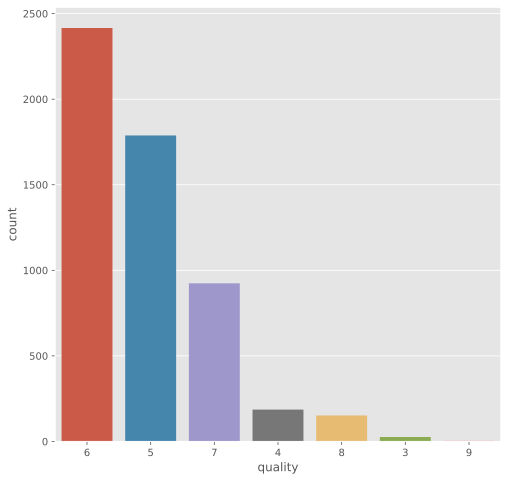

In [99]:
plt.figure(figsize=(8,8))
sns.countplot(data=train, x='quality',
              order=train['quality'].value_counts().sort_values(ascending=False).index)

In [26]:
train['type'].value_counts()

white    4159
red      1338
Name: type, dtype: int64

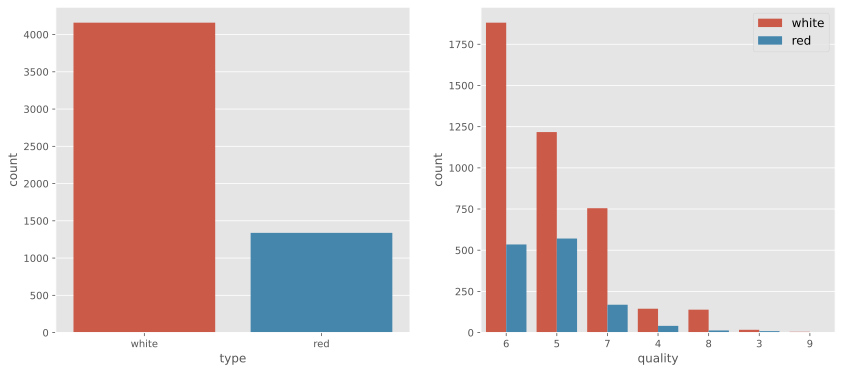

In [110]:
f, ax = plt.subplots(1,2 , figsize=(14,6))
sns.countplot(data=train, x='type', ax=ax[0])
sns.countplot(data=train, x='quality', hue='type',ax=ax[1],
              order=train['quality'].value_counts().sort_values(ascending=False).index)

ax[1].legend(loc='upper right', prop={'size':12})
plt.show()

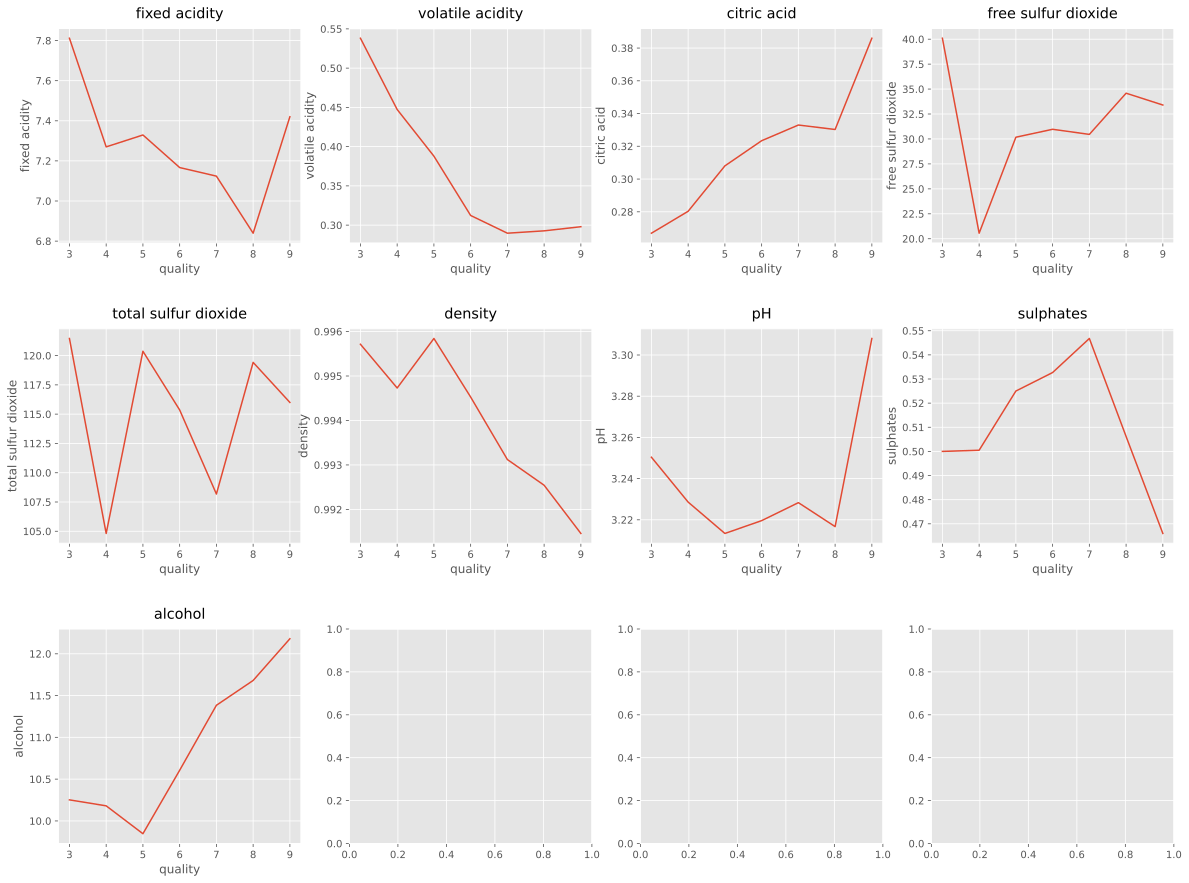

In [142]:
f, ax = plt.subplots(3,4, figsize=(20,15))
sns.lineplot(data=train, x='quality', y='fixed acidity', ci=None,ax=ax[0][0])
ax[0][0].set_title("fixed acidity",y=1.02)

sns.lineplot(data=train, x='quality', y='volatile acidity', ci=None,ax=ax[0][1])
ax[0][1].set_title('volatile acidity',y=1.02)

sns.lineplot(data=train, x='quality', y='citric acid', ci=None,ax=ax[0][2])
ax[0][2].set_title('citric acid',y=1.02)

sns.lineplot(data=train, x='quality', y='free sulfur dioxide', ci=None,ax=ax[0][3])
ax[0][3].set_title('free sulfur dioxide',y=1.02)

sns.lineplot(data=train, x='quality', y='total sulfur dioxide', ci=None,ax=ax[1][0])
ax[1][0].set_title('total sulfur dioxide',y=1.02)

sns.lineplot(data=train, x='quality', y='density', ci=None,ax=ax[1][1])
ax[1][1].set_title('density',y=1.02)

sns.lineplot(data=train, x='quality', y='pH', ci=None,ax=ax[1][2])
ax[1][2].set_title('pH',y=1.02)

sns.lineplot(data=train, x='quality', y='sulphates', ci=None,ax=ax[1][3])
ax[1][3].set_title('sulphates',y=1.02)

sns.lineplot(data=train, x='quality', y='alcohol', ci=None,ax=ax[2][0])
ax[2][0].set_title('alcohol',y=1.02)

plt.subplots_adjust(hspace=0.4)
plt.show()

## 3.1 상관관계

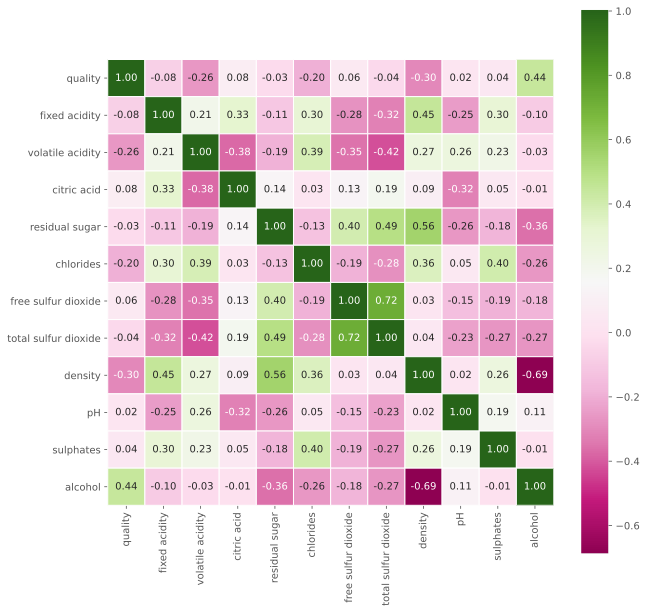

In [65]:
corr = train.drop(['index'], axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, annot=True, fmt=".2f", square=True, cmap='PiYG', linecolor='white', linewidths=1)

# 4.머신러닝

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## 4.1 데이터 정제

In [179]:
#타겟 데이터 분류하기
y_train = train['quality']
y_train.shape

(5497,)

In [180]:
#사용하지 않는 데이터 drop하기
train = train.drop(['index', 'quality'], axis=1).copy()
train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [181]:
#사용하지 않는 데이터 drop 하기
test_index = test['index']

test = test.drop(['index'],axis=1).copy()

In [201]:
#type 특성 LabelEncoder하기
train['type'] = LabelEncoder().fit_transform(train['type'])